In [1]:
from process_image import *
from model_nn import *
import numpy as np
from PIL import Image
import cv2
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [21]:
# Change the input directory, or just use a new picture with CV2. This is used if you want to use the test dataset
# Comment this cell if you wanted to use CV2 for the image input

input_directory = "../Dataset/Foto_Resize_Rotate_50x50" 
X_train, y_train, X_test, y_test, X_val, y_val, scalerinput = process_all(input_directory)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

Found folders: ['Azmira', 'David', 'Dimas', 'Fadhli', 'Fadlin', 'Hafidz', 'Haidar', 'Hanna', 'Keiko', 'Khansa', 'Mikhael', 'Puti', 'Raesa', 'Satwika', 'Toni']
(968, 2500) (968, 15) (208, 2500) (208, 15) (208, 2500) (208, 15)


In [20]:
# This is CV2 cell, comment this if you didn't want to use it 
image_dir = "../Dataset/Foto_CV2"
# Create the image directory if it doesn't exist
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

cap = cv2.VideoCapture(0)
count = 1

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Display instructions on the frame
    cv2.putText(frame, "Press 'q' to take a picture and quit", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Press 'q' to quit and take a picture
    if cv2.waitKey(1) & 0xFF == ord('q'):
        # Save the captured image
        image_path = os.path.join(image_dir, f"Foto_{count}.png")
        cv2.imwrite(image_path, frame)
        count += 1

        # Convert to grayscale using PIL
        image = Image.open(image_path).convert('L')

        # Resize the image
        size = 50 # if you want 30x30 put 30, or 70x70 put 70
        resized_image = image.resize((size, size))

        # Flatten the image and reshape it to (2500, 1)
        X_test = np.array(resized_image).flatten().reshape(-1, 1) / 255.0
        X_test = X_test.reshape(1, -1)
        X_test.shape

        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
# Upload Image
image_dir = "../Dataset/Foto_CV2"

# Hide the main tkinter window
print("Initializing Tkinter...")
root = Tk()
root.withdraw()
print("Tkinter window hidden.")

# Ask the user to select an image file
print("Opening file dialog...")
file_path = askopenfilename()
print(f"File selected: {file_path}")

if file_path:
    # Open the selected image
    print("Opening the selected image...")
    uploaded_image = Image.open(file_path)

    # Save the uploaded image to the specified directory
    print("Saving the uploaded image...")
    uploaded_image.save(os.path.join(image_dir, "Foto_Upload.png"))
    image_path = os.path.join(image_dir, "Foto_Upload.png")
    image = Image.open(image_path).convert('L')

    # Resize the image
    size = 50  # if you want 30x30 put 30, or 70x70 put 70
    print(f"Resizing the image to {size}x{size}...")
    resized_image = image.resize((size, size))

    # Flatten the image and reshape it to (2500, 1)
    print("Flattening and reshaping the image...")
    X_test = np.array(resized_image).flatten().reshape(-1, 1) / 255.0
    X_test = X_test.reshape(1, -1)
    print("Image processing complete.")
else:
    print("No file selected.")

Initializing Tkinter...
Tkinter window hidden.
Opening file dialog...


: 

In [22]:
# Use this if you want to use external picture
# You may change the hidden layer's nodes

input_directory = "../Dataset/Foto_Resize_Rotate_50x50" 
y_pred = np.zeros((1,15))
model_test = FaceRecognitionModel(X_test.shape[1], [64], y_pred.shape[1])
model_test.add_labels_from_folders(input_directory)

In [ ]:
# Use this if you want to use test dataset
# You may change the hidden layer's nodes

model_test = FaceRecognitionModel(X_test.shape[1], [64], y_test.shape[1]) 
model_test.add_labels_from_folders(input_directory)

In [23]:
# Load model
weights_directory = "./My_Model_50/04_Ryoshu_Rotate.pkl"
model_test.load_model(weights_directory)

In [26]:
# This is universal
y_pred = model_test.predict(X_test)
y_pred_label = model_test.predict_label(X_test)
print(y_pred_label)

['Dimas']


In [26]:
# Only available if you use test dataset
model_test.evaluate_metrics(X_test, y_test)

Accuracy: 0.8653846153846154
Azmira - Precision: 0.8235294117647058, Recall: 0.9333333333333333, F1 Score: 0.8749999999999999
David - Precision: 1.0, Recall: 0.8823529411764706, F1 Score: 0.9375
Dimas - Precision: 0.8235294117647058, Recall: 1.0, F1 Score: 0.9032258064516129
Fadhli - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Fadlin - Precision: 1.0, Recall: 0.6666666666666666, F1 Score: 0.8
Hafidz - Precision: 0.8666666666666667, Recall: 0.9285714285714286, F1 Score: 0.896551724137931
Haidar - Precision: 0.46153846153846156, Recall: 0.8571428571428571, F1 Score: 0.6
Hanna - Precision: 0.7272727272727273, Recall: 0.8888888888888888, F1 Score: 0.7999999999999999
Keiko - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Khansa - Precision: 0.5, Recall: 0.2727272727272727, F1 Score: 0.3529411764705882
Mikhael - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Puti - Precision: 0.8333333333333334, Recall: 0.9375, F1 Score: 0.8823529411764706
Raesa - Precision: 0.625, Recall: 0.45454545454545453, F1 Sco

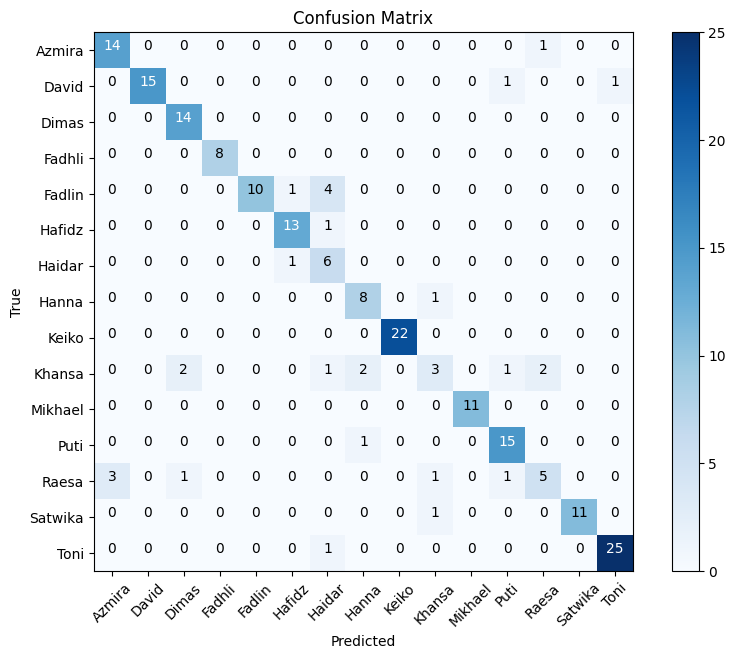

In [27]:
# Only available if you use test dataset
model_test.plot_confusion_matrix(X_test, y_test)

In [28]:
#model_test.save_model("./My_Model_50/")